In [86]:
include("Gync.jl")
using JLD

acceptance(mc::Array) = mapslices(mc,[1,2]) do mc
    n = size(mc,1)
    sum([mc[i,:,:] != mc[i+1,:,:] for i in 1:n-1]) / (n-1);
  end |> vec

acceptance(c::AbstractChains) = acceptance(c.value)

mergeparms!(aparms, sparms) = (aparms[SAMPLEPARMS]=sparms; aparms)

mergeparms(aparms,sparms) = mergeparms!(copy(aparms), sparms)

function loglikelihood(mc::Array{Float64,3}, data::Matrix)
    mapslices(mc, 2) do modelparms
        aparms = mergeparms(parms, modelparms[1:length(SAMPLEPARMS)])
        y0 = modelparms[length(SAMPLEPARMS)+1:end]
        loglikelihood(data, aparms, y0)
    end
end

mergepersons(mcs) = cat(3,map(x->x[1:minimum(map(x->size(x,1), mcs)),:,:],mcs)...);

loglikelihood(mc::AbstractChains, data::Matrix) = loglikelihood(mc.value, data);

function newestjld()
    jlds = filter(x->endswith(x, "jld"), readdir())
    file = jlds[indmax(map(x->stat(x).mtime, jlds))]
end;

In [89]:
file = newestjld()
#file = "p3-adaptnone-r0.1-sy10-spar10-spro0.001-2truncflatprior.jld"
plotspecies = [1:10, 83:94] #[1:82,83:115]

println("file: ", file)
@time mcs = load(file)["mc"] |> mergepersons
mcs = Chains(mcs, names = vcat(parameternames[SAMPLEPARMS], speciesnames))

println("size: ", size(mcs))
println("acc:  ", map(x->round(x,3),acceptance(mcs)))

file: amm all ugm-flat 1pX5c 0.2r 1sy 20sp 0.1p.jld
  1.720028 seconds (303 allocations: 2.871 GB, 3.41% gc time)
size: (223400,115,5)
acc:  [0.299,0.322,0.311,0.327,0.317]


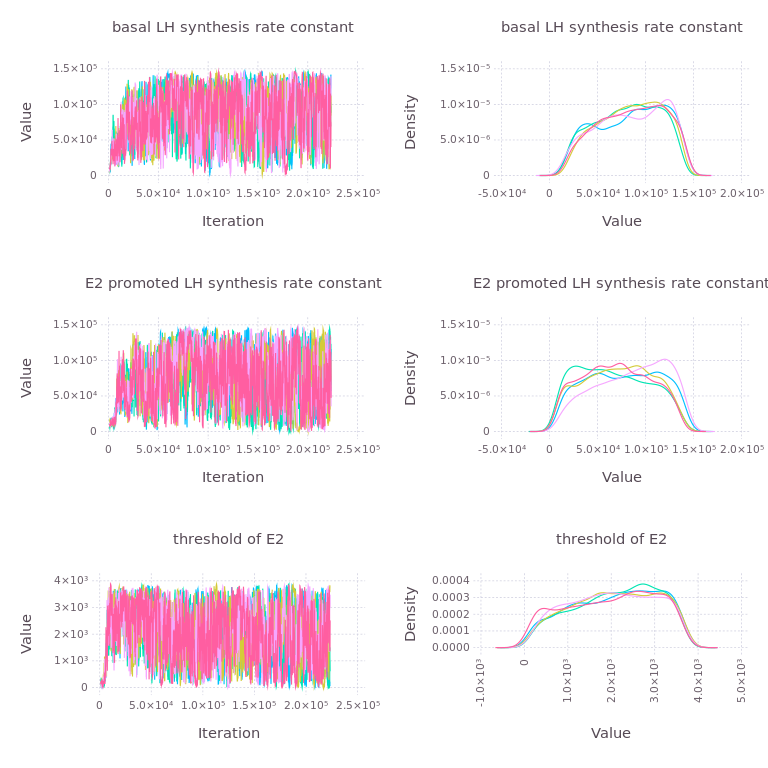

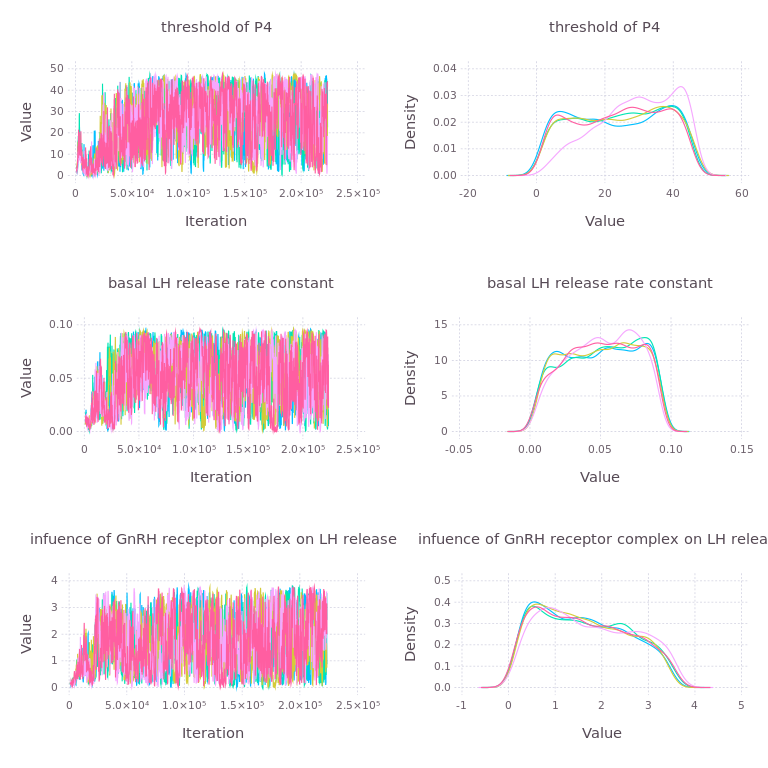

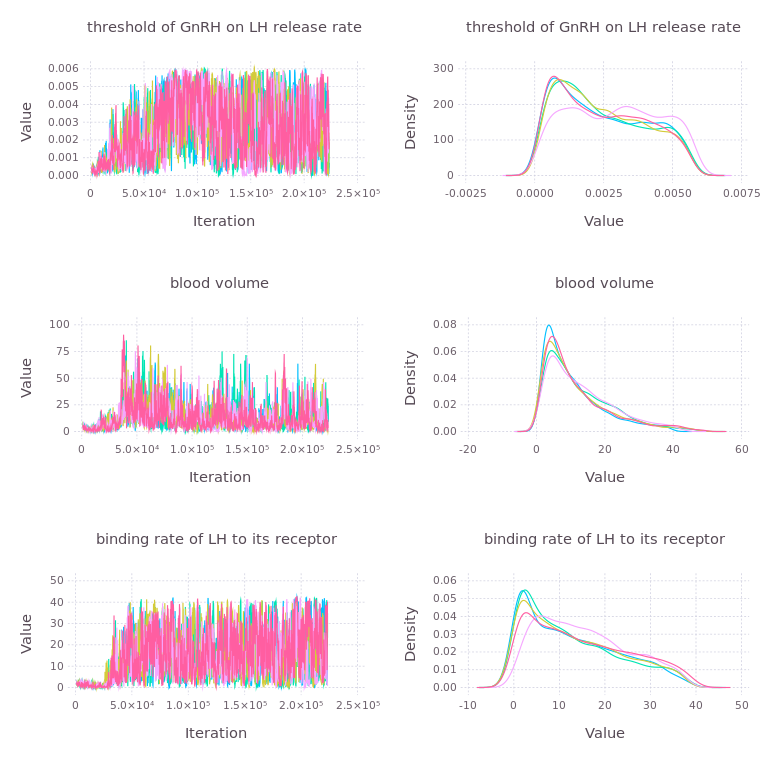

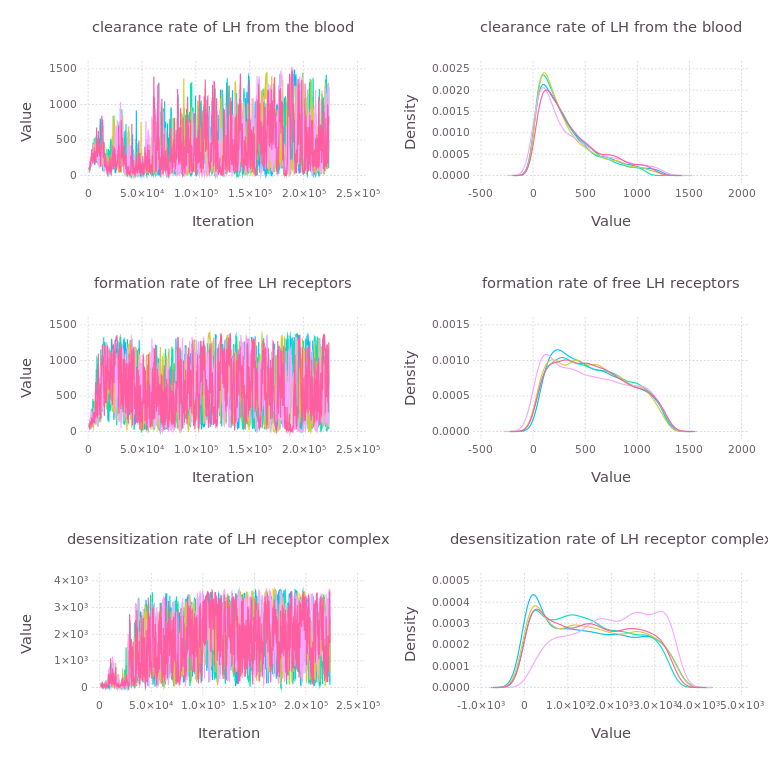

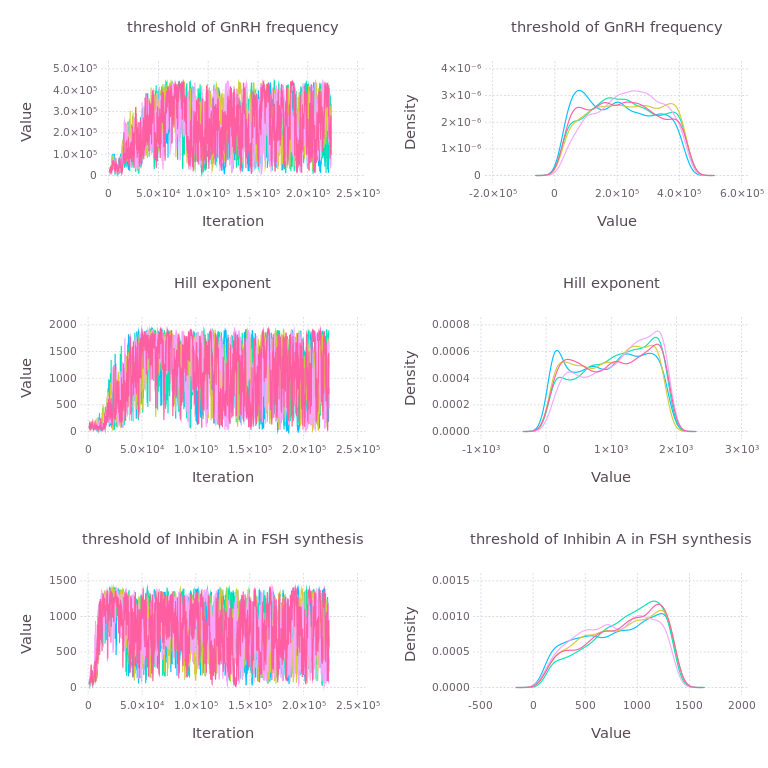

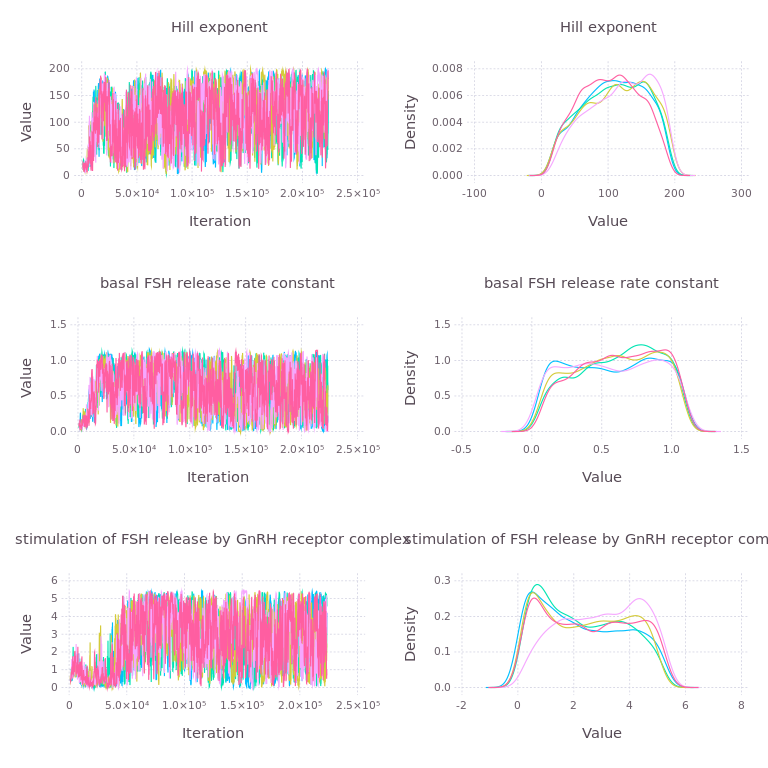

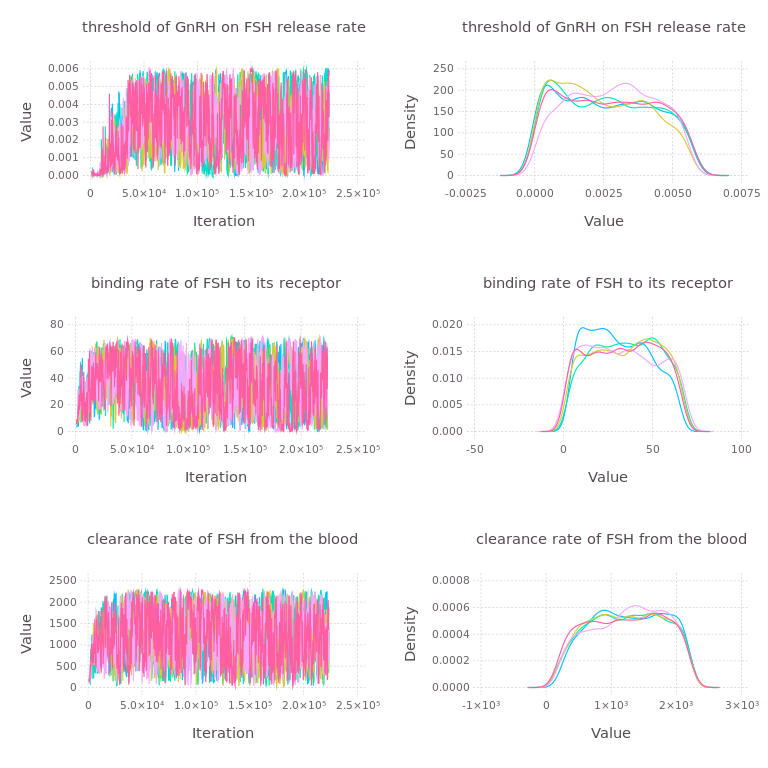

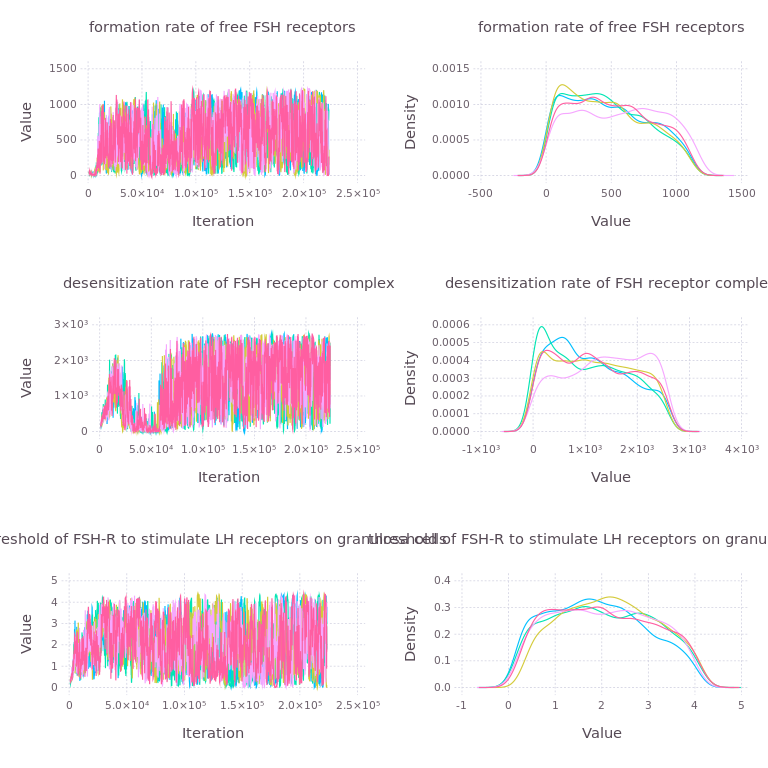

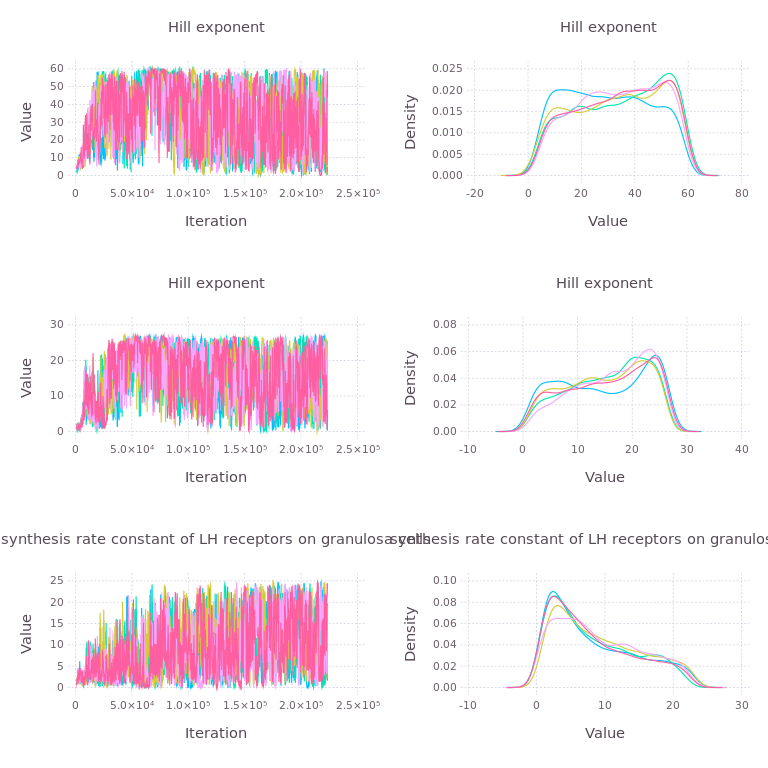

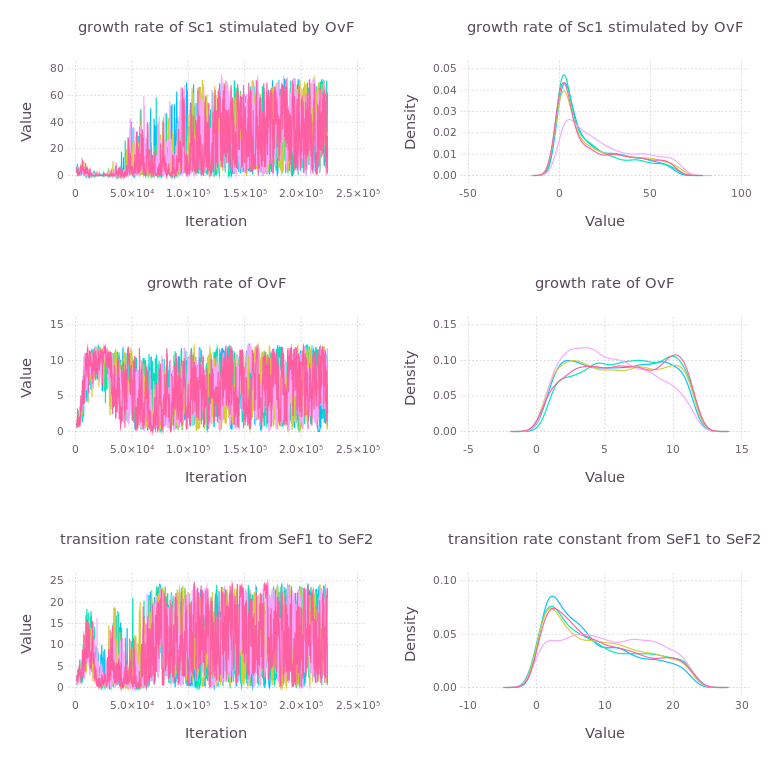

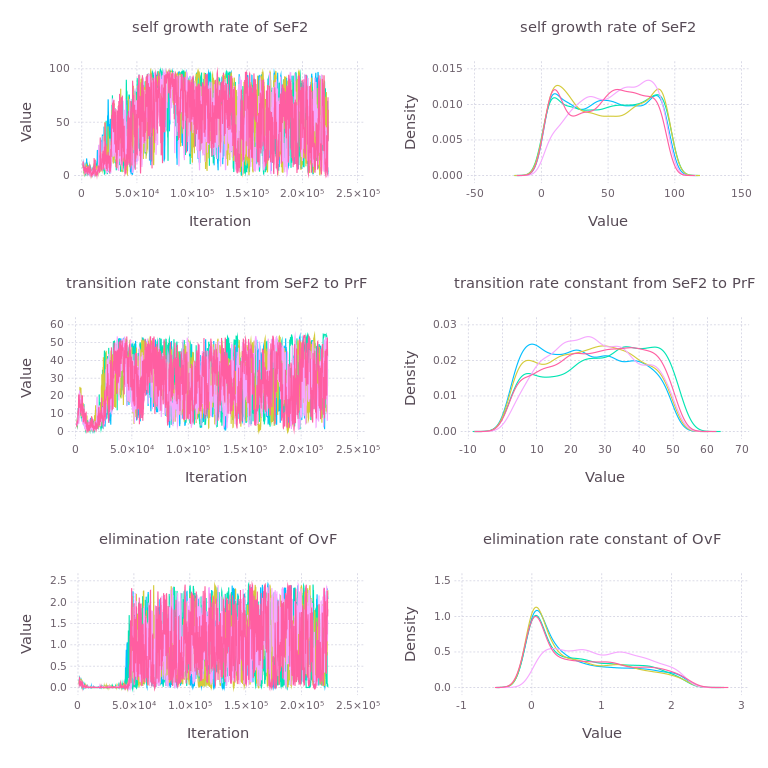

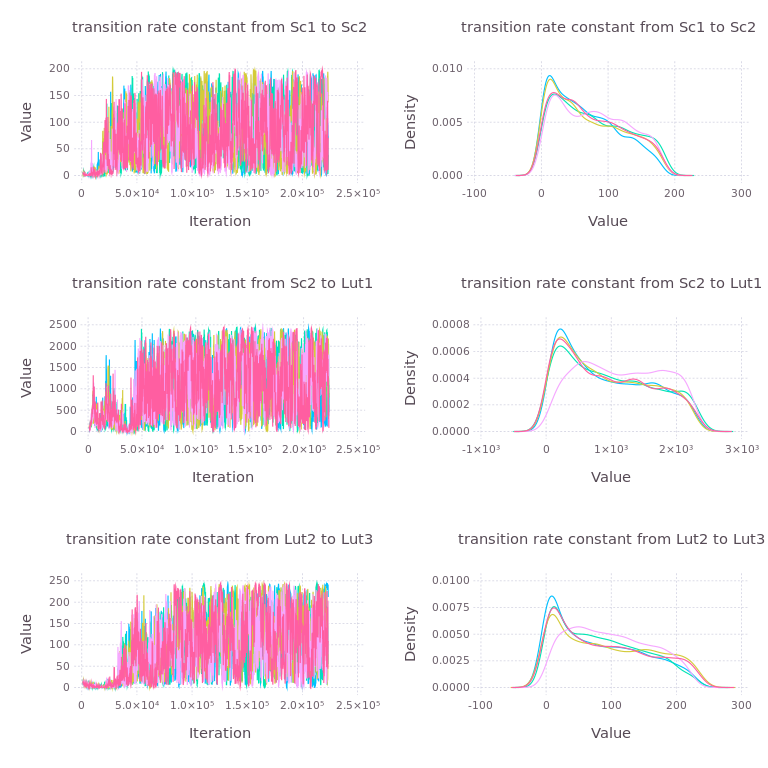

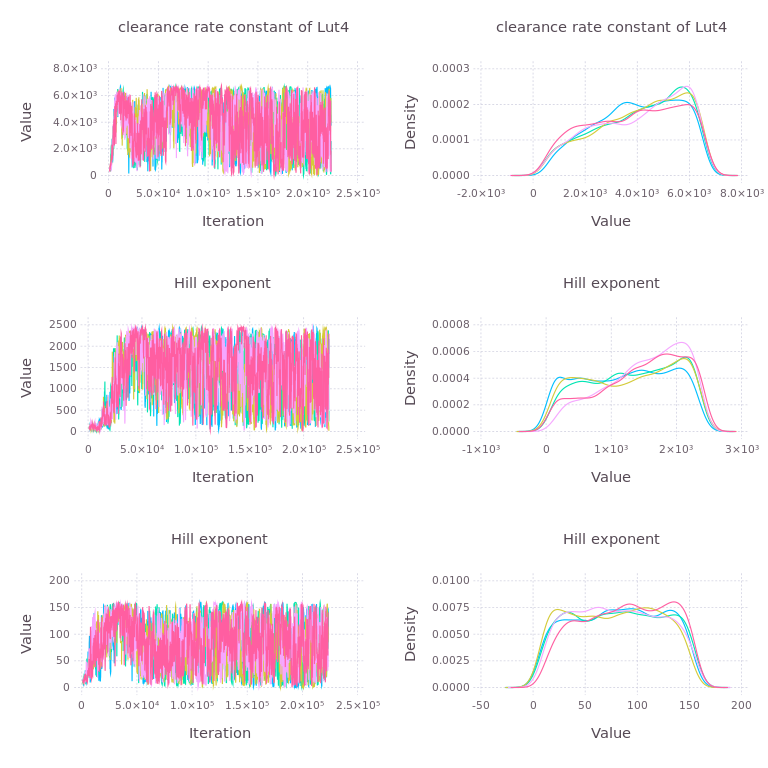

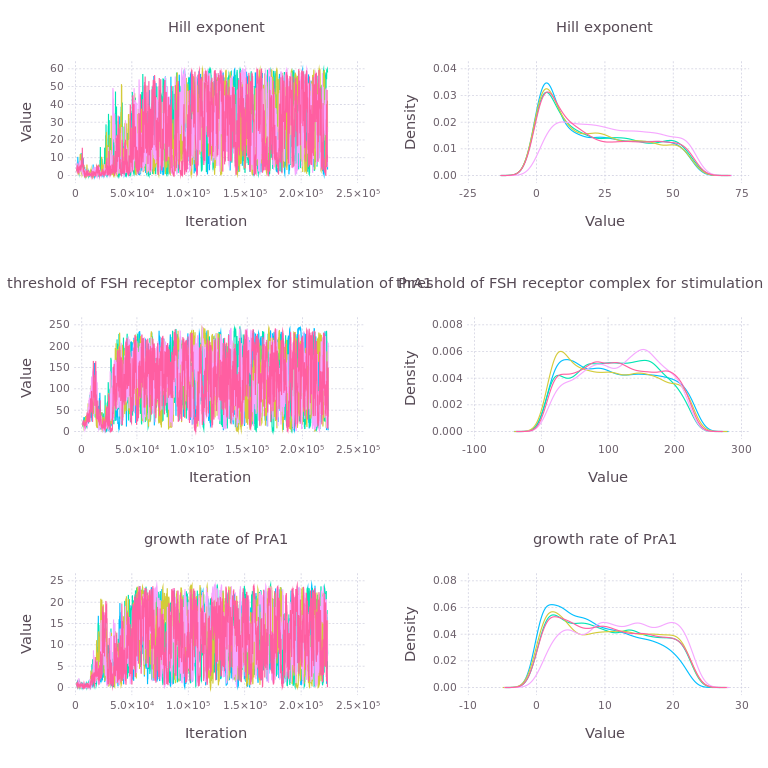

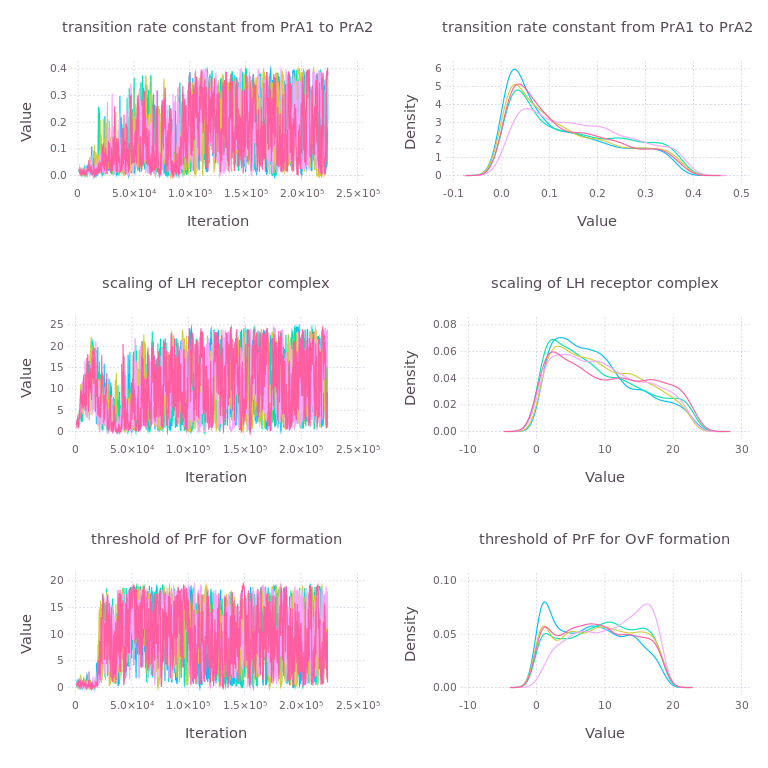

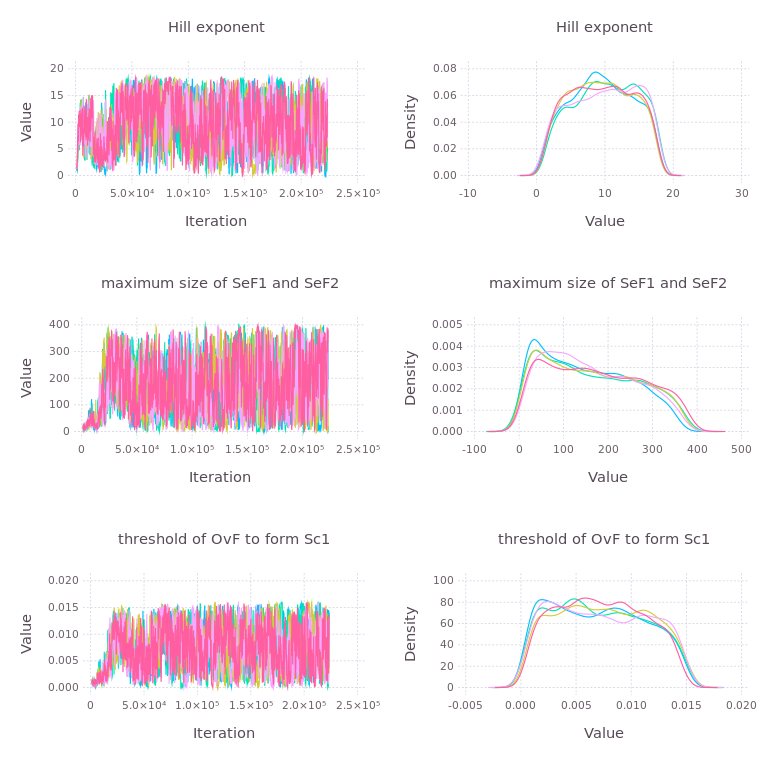

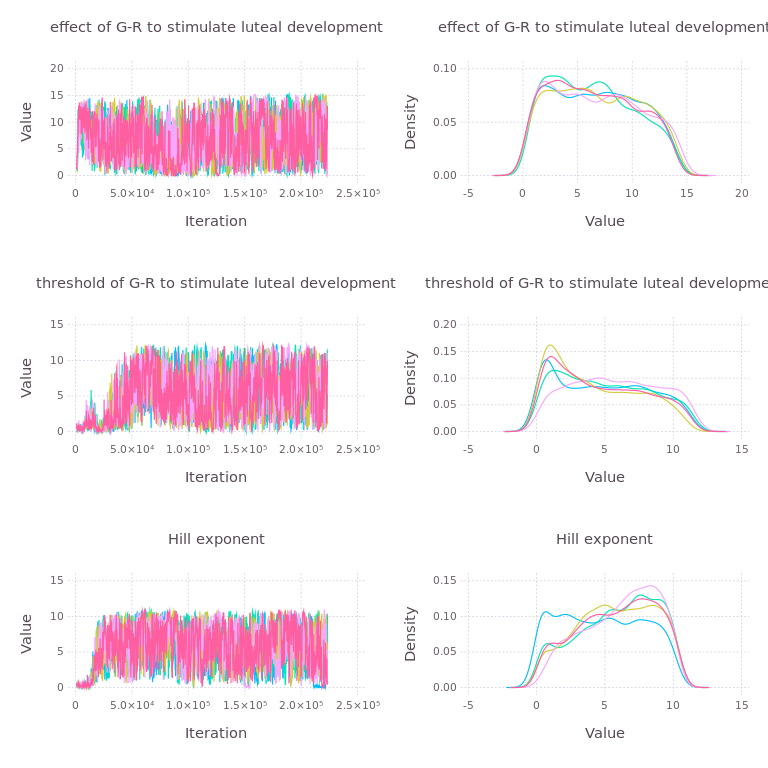

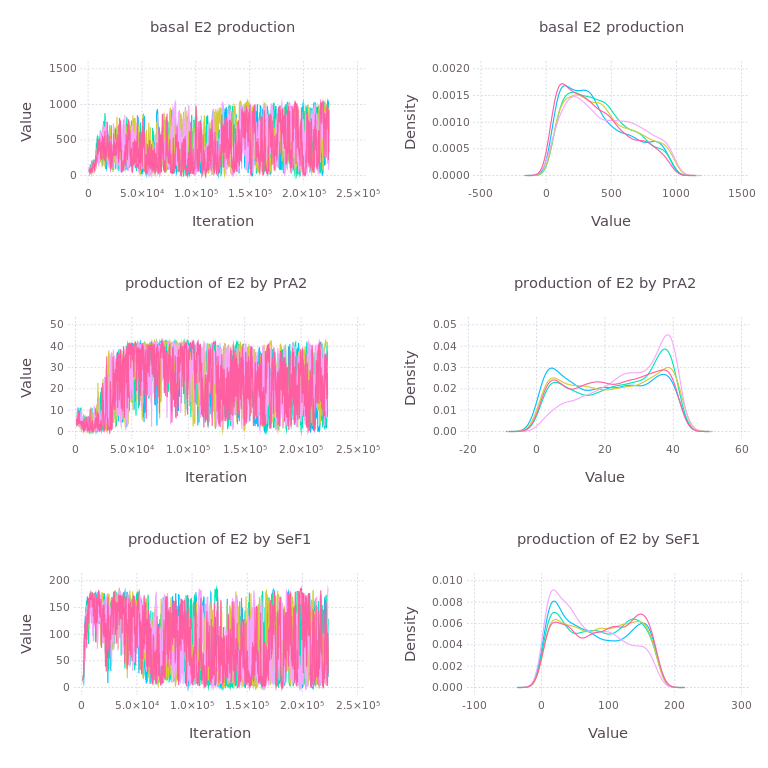

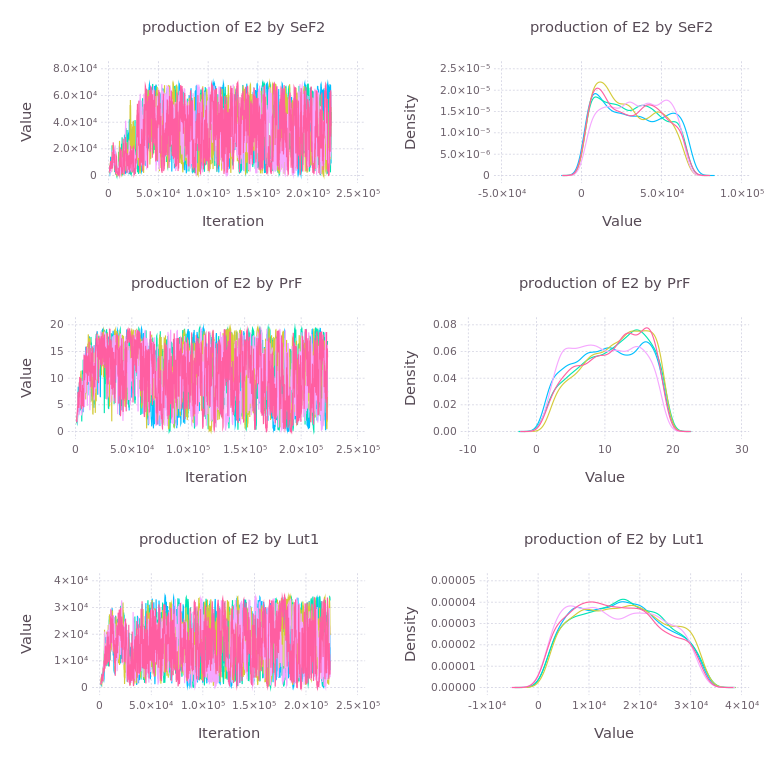

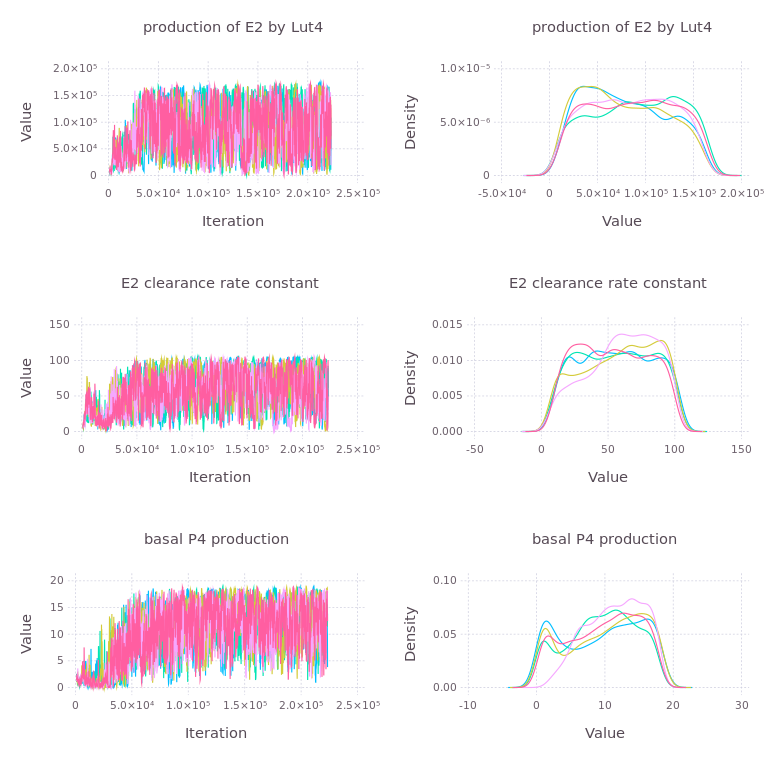

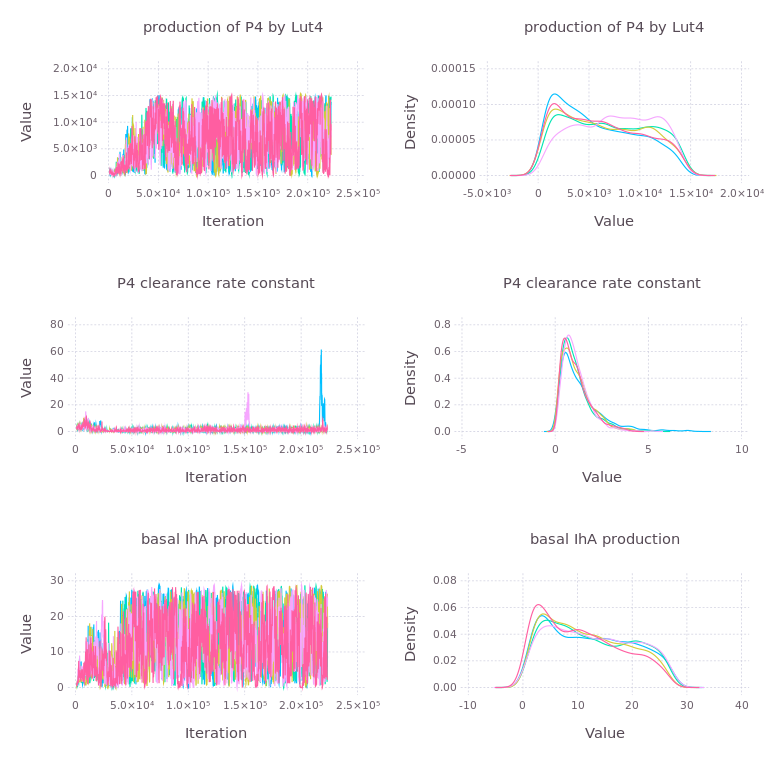

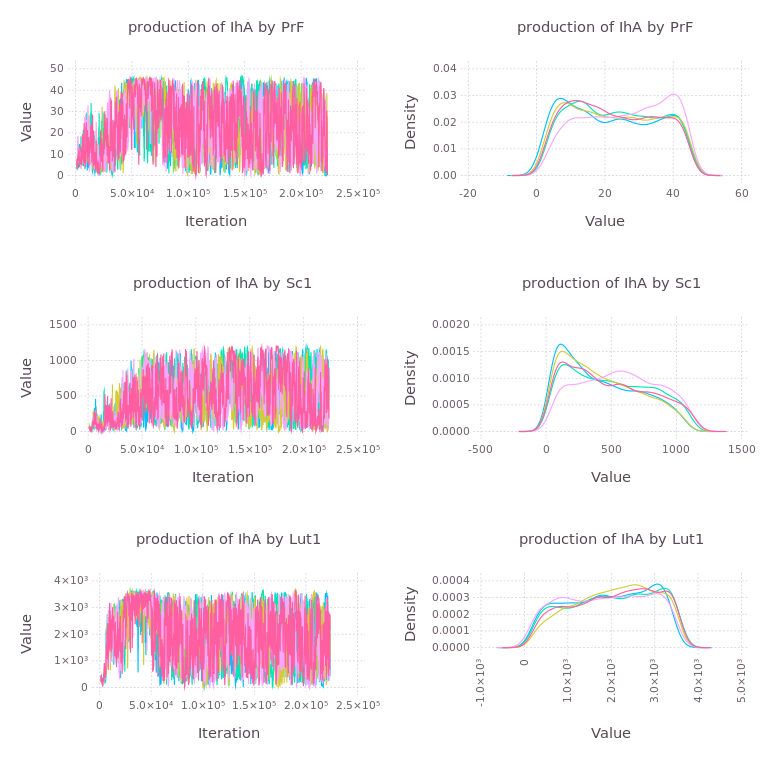

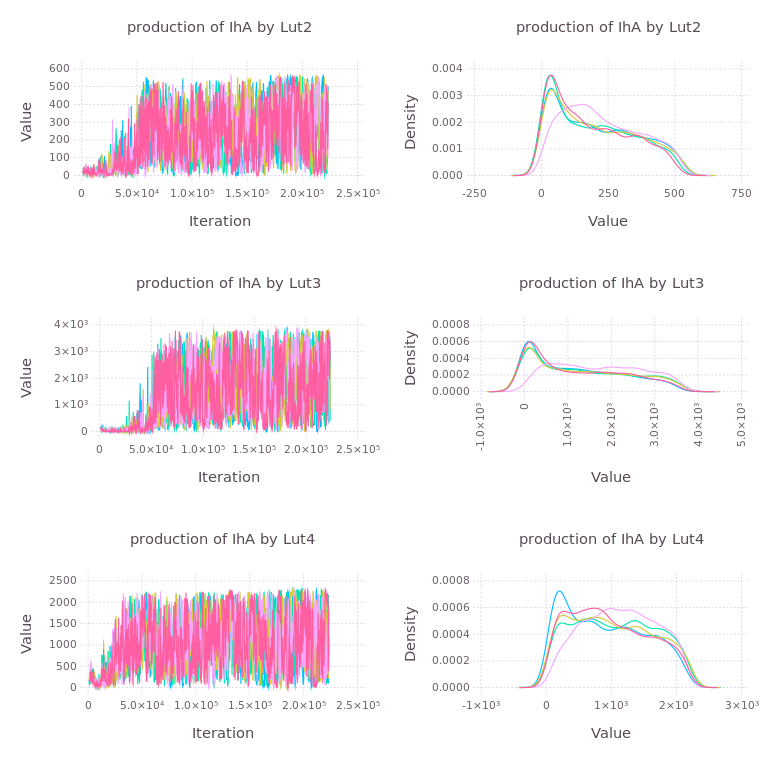

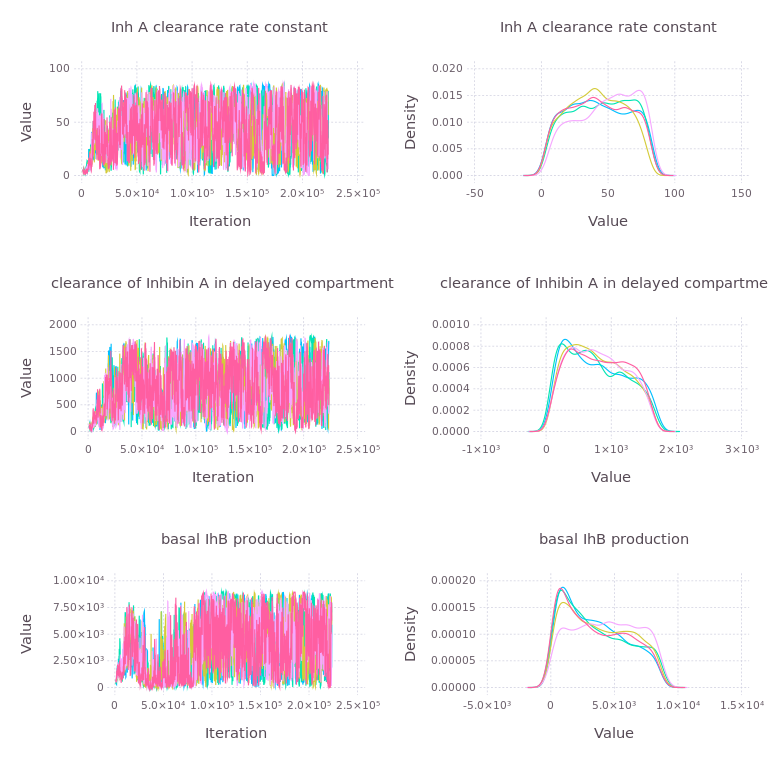

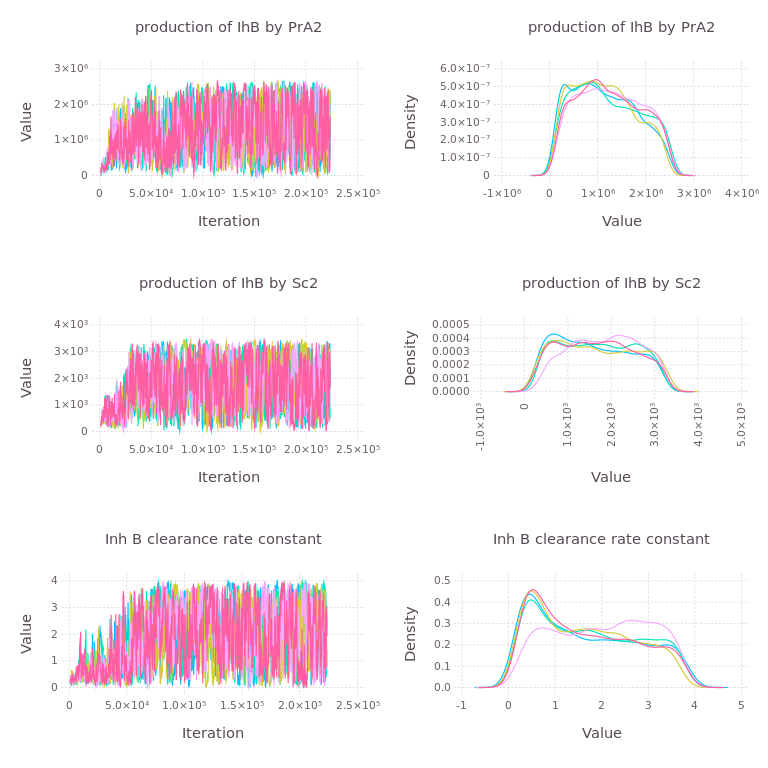

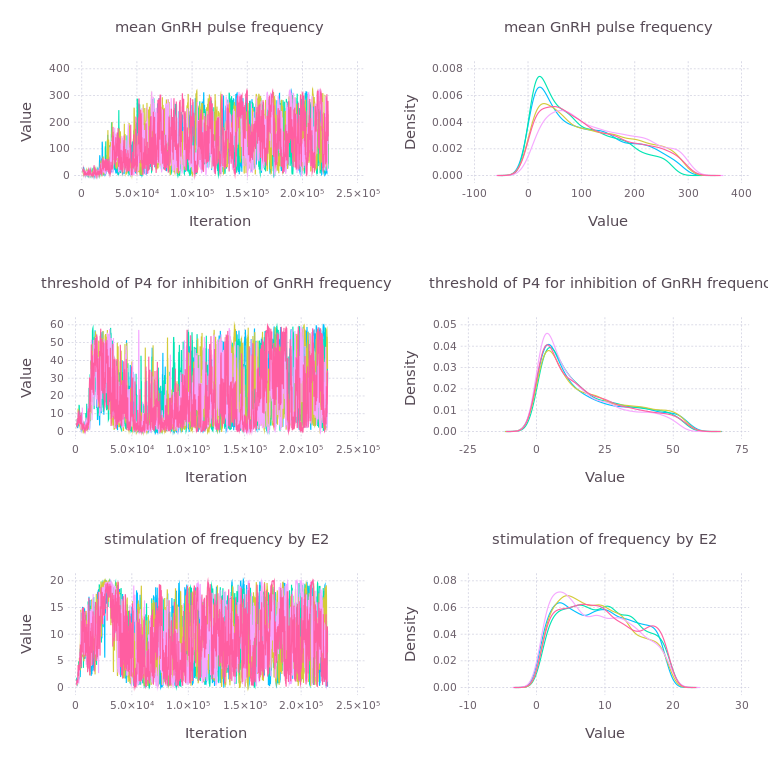

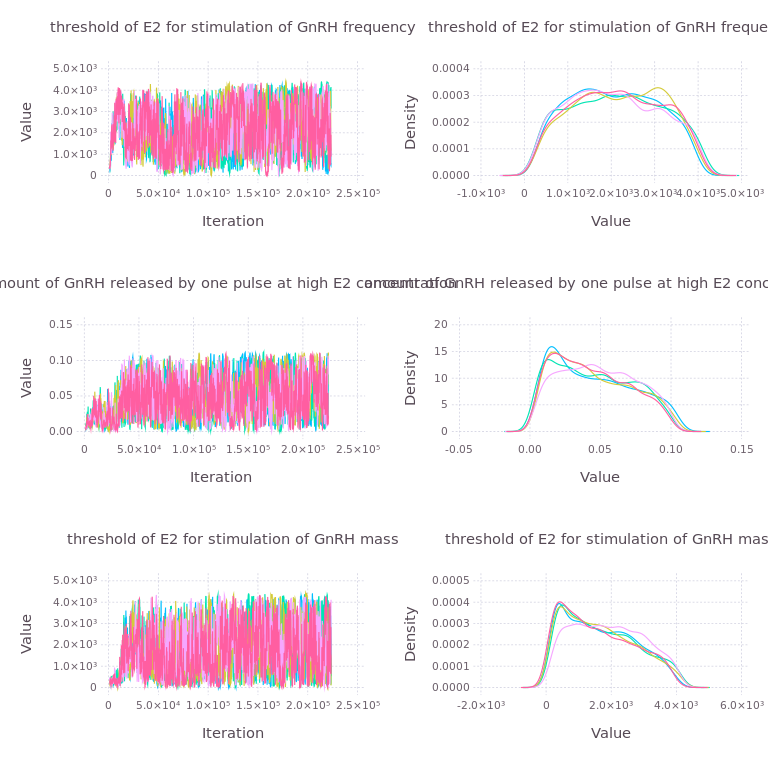

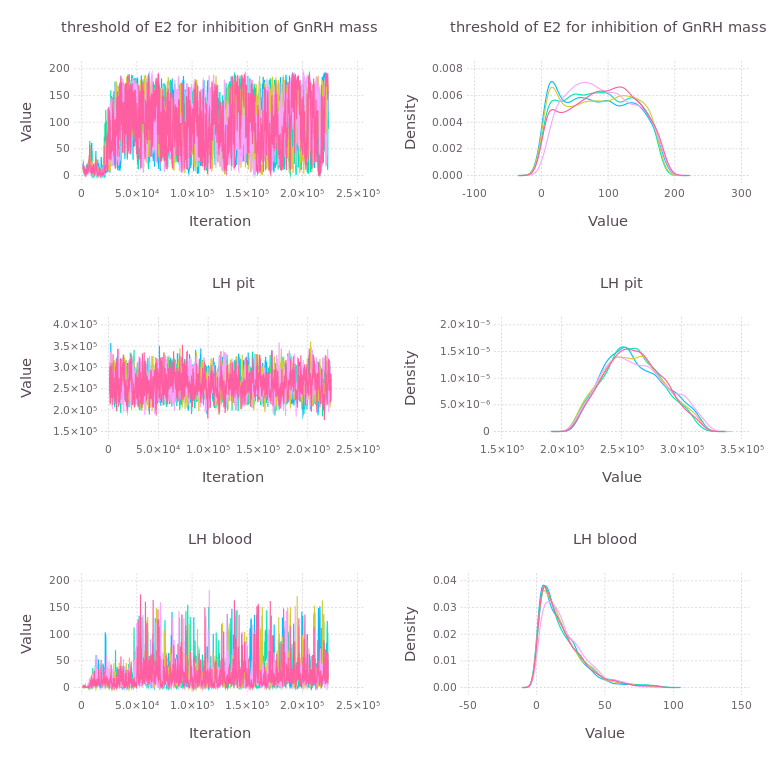

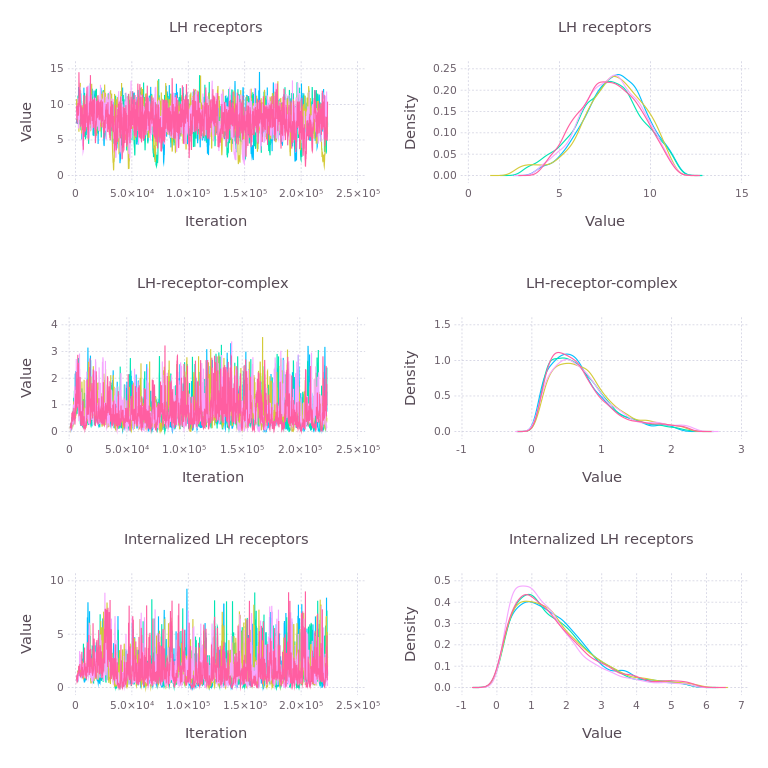

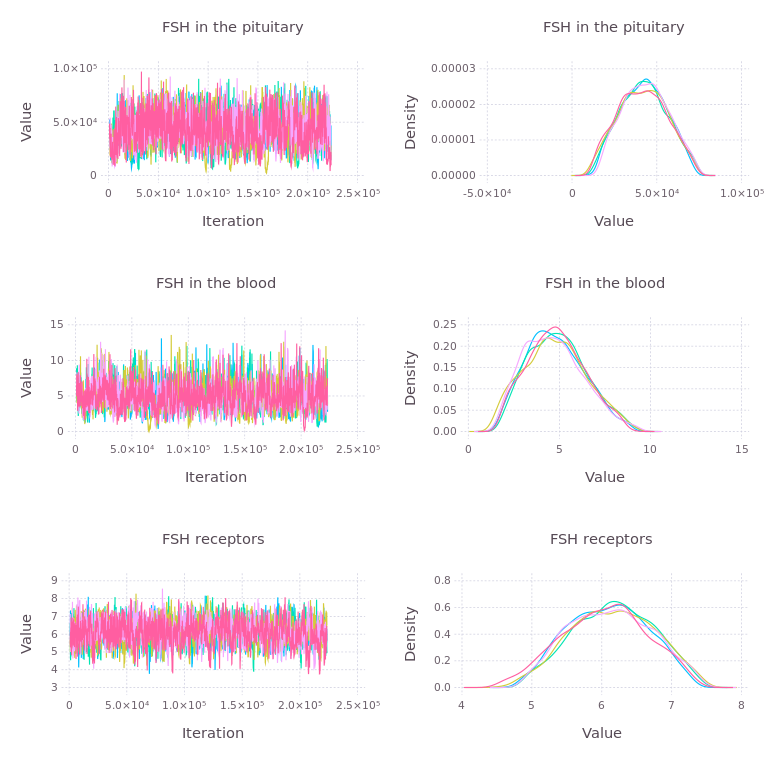

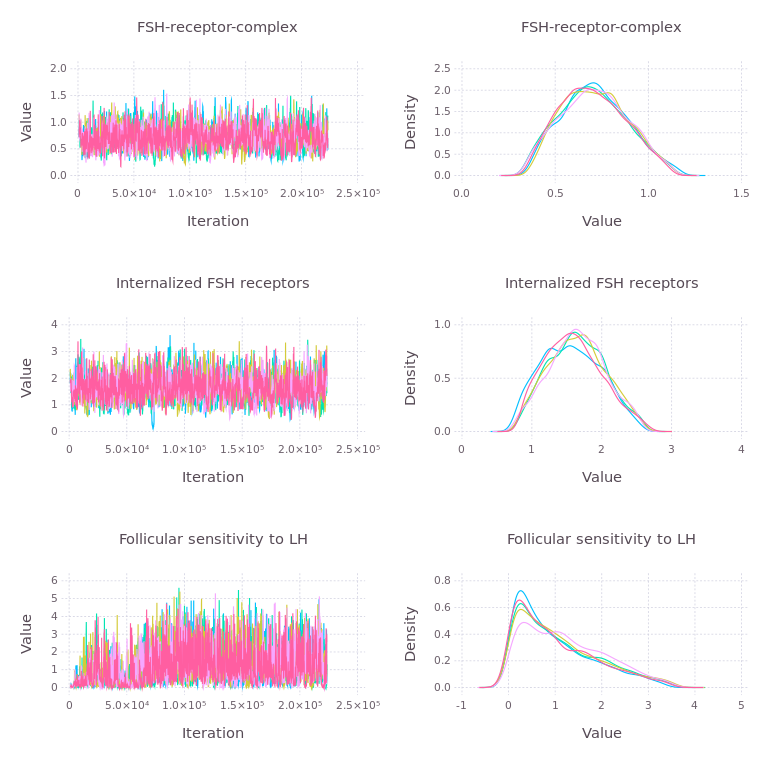

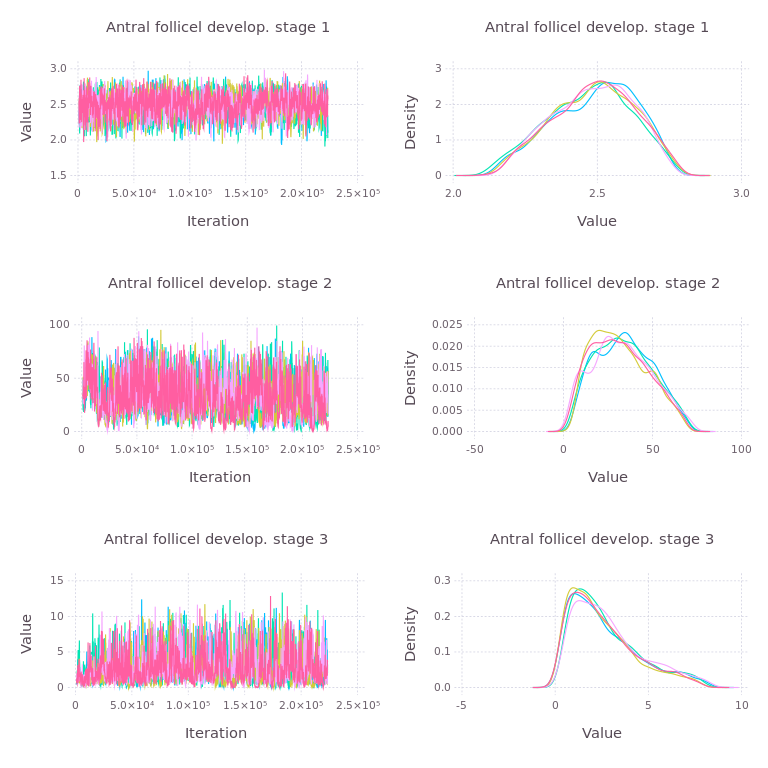

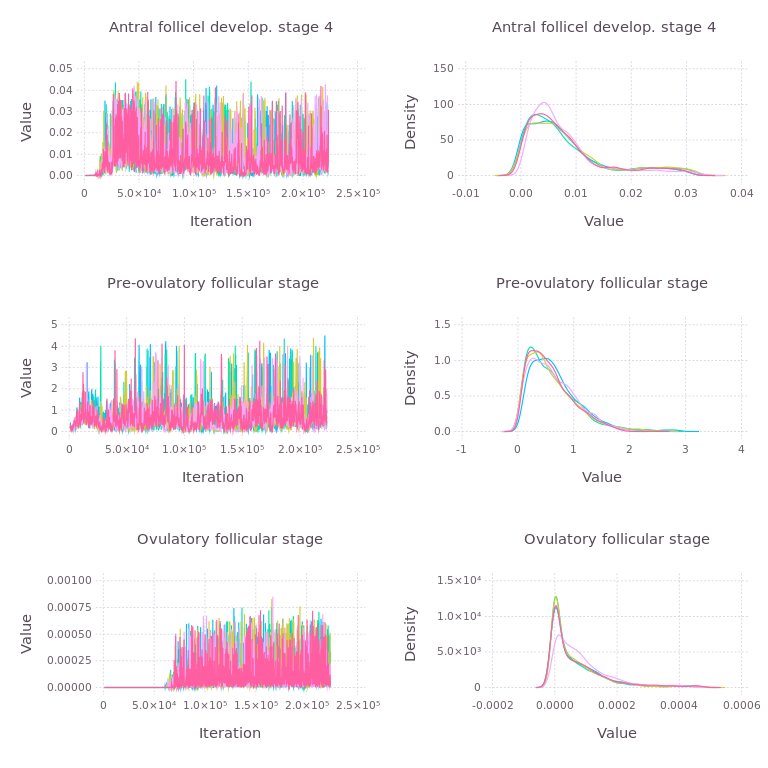

In [ ]:
@time draw(plot(mcs[1000:100:end,:,:]), ask=false, fmt=:png)

In [77]:
x=gelmandiag(mcs[:,:,:])
notc = x.value[:,2].>1.2
println("should be rejected: ",sum(notc))
sum(x.value[notc,2])

should be rejected: 1

1.245

In [85]:
parms, y0 = loadparms()
SIGMA_RHO = 0.2
SIGMA_Y0  = 1
SIGMA_PARMS = 20
SIGMA_PROPOSAL = 0.1
loglikelihood(mcs[1:500:end,:,:], loadpfizer()[1])

36x1x5 Array{Float64,3}:
[:, :, 1] =
 -430.32   
   -2.38672
   -3.80299
   -2.59752
   -4.28442
   -3.08227
   -2.66456
   -3.03029
   -2.26195
   -3.58018
   -3.98763
   -3.08911
   -4.14905
    ⋮      
   -4.21184
   -3.39898
   -4.98143
   -3.60362
   -3.40324
   -5.52973
   -3.28276
   -4.29125
   -4.26798
   -3.97542
   -3.68308
   -5.54884

[:, :, 2] =
 -430.32   
   -3.95708
   -2.65835
   -4.64935
   -5.95144
   -2.42085
   -4.71662
   -2.36983
   -2.43368
   -4.15556
   -3.76268
   -3.96502
   -2.22771
    ⋮      
   -4.3965 
   -5.25244
   -3.92221
   -4.91988
   -3.3751 
   -5.07728
   -4.44488
   -4.60817
   -3.96833
   -5.16817
   -4.79048
   -5.06644

[:, :, 3] =
 -430.32   
   -3.53444
   -2.05761
   -2.48695
   -2.39196
   -2.0758 
   -3.55571
   -5.36911
   -3.52257
   -3.06768
   -4.72692
   -2.90461
   -3.17239
    ⋮      
   -4.75482
   -4.92934
   -3.49763
   -4.67814
   -5.44555
   -3.53817
   -4.78759
   -5.48884
   -4.91596
   -4.4703 
   -4.60794
   -5.78762

